# Simple Linear Regression Project

## Understanding The Data

We have downloaded a fuel consumption dataset, FuelConsumption.csv, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.[Data source]_(http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g. 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182 --> low --> 0

## Import Required Packages

In [1]:
%pip install scikit-learn
%pip install numpy


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline

## Import and Read the Data


In [11]:
headers = ['ModelYear','Make','Model','Vehicle_Class','Engine_Size','Cylinders','Transmission','FuelType','Fuel_Consumption_City','Fuel_Consumption_Hwy','Fuel_Consumption_COMB','Fuel_Consumption_MPG','CO2Emissions','CO2_Rating','Smog_Rating']
df = pd.read_csv('vehicle_fuel_consumption.csv')
df.columns = headers
print(df.head(10))

   ModelYear        Make                Model  \
0       2024       Acura       Integra A-SPEC   
1       2024       Acura       Integra A-SPEC   
2       2024       Acura       Integra Type S   
3       2024       Acura           MDX SH-AWD   
4       2024       Acura    MDX SH-AWD Type S   
5       2024       Acura           RDX SH-AWD   
6       2024       Acura    RDX SH-AWD A-SPEC   
7       2024  Alfa Romeo               Giulia   
8       2024  Alfa Romeo           Giulia AWD   
9       2024  Alfa Romeo  Giulia Quadrifoglio   

                     Vehicle_Class  Engine_Size  Cylinders Transmission  \
0                        Full-size          1.5          4          AV7   
1                        Full-size          1.5          4           M6   
2                        Full-size          2.0          4           M6   
3     Sport utility vehicle: Small          3.5          6         AS10   
4  Sport utility vehicle: Standard          3.0          6         AS10   
5     Spor

## Data Cleaning and Preparation

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ModelYear              768 non-null    int64  
 1   Make                   768 non-null    object 
 2   Model                  768 non-null    object 
 3   Vehicle_Class          768 non-null    object 
 4   Engine_Size            768 non-null    float64
 5   Cylinders              768 non-null    int64  
 6   Transmission           768 non-null    object 
 7   FuelType               768 non-null    object 
 8   Fuel_Consumption_City  768 non-null    float64
 9   Fuel_Consumption_Hwy   768 non-null    float64
 10  Fuel_Consumption_COMB  768 non-null    float64
 11  Fuel_Consumption_MPG   768 non-null    int64  
 12  CO2Emissions           768 non-null    int64  
 13  CO2_Rating             768 non-null    int64  
 14  Smog_Rating            768 non-null    int64  
dtypes: flo

In [13]:
# The data apparently has no missing values
# Let's drop any duplicates if any
df.drop_duplicates(inplace=True)

## Data Exploration

Let's have a descriptive exploration of our data

In [16]:
# Summarize the data
df.describe()

,ModelYear,Engine_Size,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_COMB,Fuel_Consumption_MPG,CO2Emissions,CO2_Rating,Smog_Rating
count,768.0,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,2024.0,3.086198,5.541667,12.410417,9.432552,11.071224,27.332031,259.190104,4.479167,5.497396
std,0.0,1.268500,1.891678,3.392118,2.303873,2.845196,7.710060,64.902216,1.304723,1.607510
min,2024.0,1.200000,3.000000,4.400000,4.400000,4.400000,11.000000,104.000000,1.000000,1.000000
25%,2024.0,2.000000,4.000000,10.100000,7.700000,9.000000,22.000000,210.000000,4.000000,5.000000
50%,2024.0,3.000000,6.000000,12.250000,9.300000,11.000000,26.000000,260.000000,4.000000,6.000000
75%,2024.0,3.600000,6.000000,14.500000,10.825000,12.800000,31.000000,299.000000,5.000000,7.000000
max,2024.0,8.000000,16.000000,30.300000,20.900000,26.100000,64.000000,608.000000,8.000000,8.000000


Let's select some features to explore some more

In [17]:
cdf = df[['Engine_Size','Cylinders','Fuel_Consumption_COMB','CO2Emissions']]
cdf.head(10)

,Engine_Size,Cylinders,Fuel_Consumption_COMB,CO2Emissions
0,1.5,4,7.4,172
1,1.5,4,7.8,181
2,2.0,4,9.9,230
3,3.5,6,11.2,263
4,3.0,6,12.4,291
5,2.0,4,9.9,232
6,2.0,4,10.3,241
7,2.0,4,8.7,205
8,2.0,4,9.2,217
9,2.9,6,11.6,271


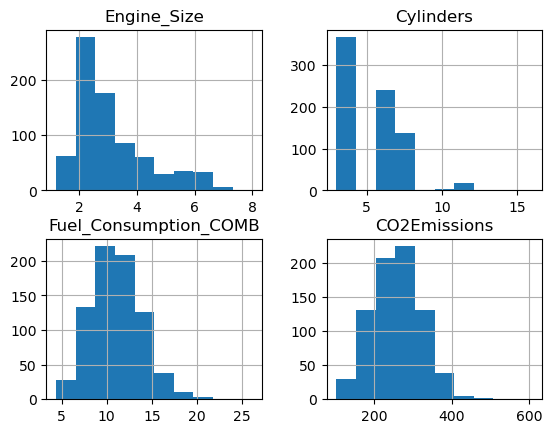

In [18]:
# Let's visualize each feature separately
viz = cdf[['Engine_Size','Cylinders','Fuel_Consumption_COMB','CO2Emissions']]
viz.hist()
plt.show()

Now, let's plot each feature against the emission to see how linear their relationship is

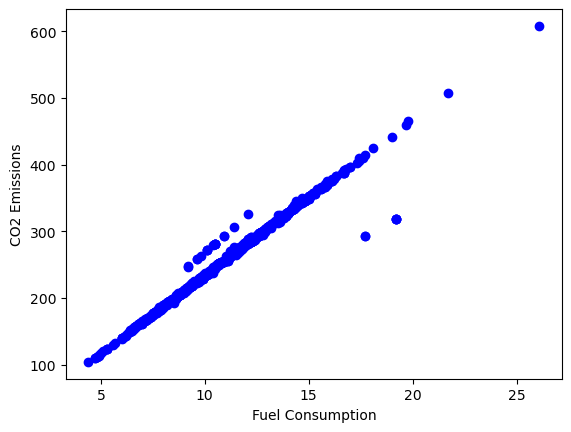

In [19]:
plt.scatter(cdf.Fuel_Consumption_COMB, cdf.CO2Emissions, color='blue')
plt.xlabel('Fuel Consumption')
plt.ylabel('CO2 Emissions')
plt.show()

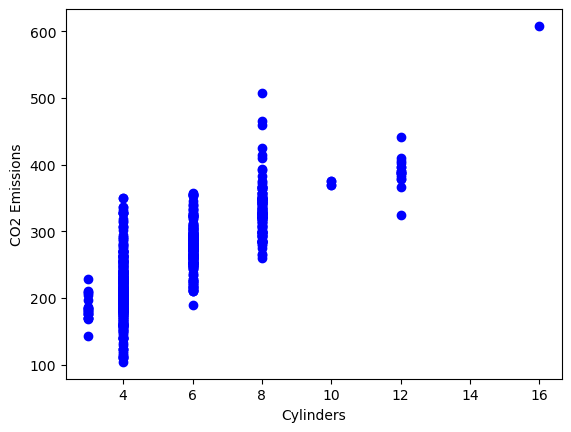

In [20]:
plt.scatter(cdf.Cylinders, cdf.CO2Emissions, color='blue')
plt.xlabel('Cylinders')
plt.ylabel('CO2 Emissions')
plt.show()

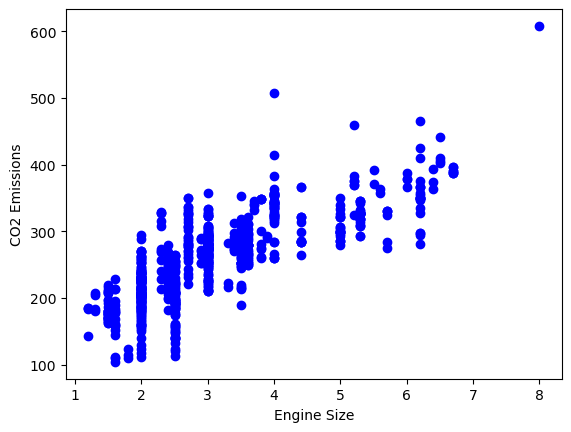

In [21]:
plt.scatter(cdf.Engine_Size, cdf.CO2Emissions, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.show()

## Splitting The Dataset into Training and Testing

In [22]:
msk = np.random.rand(len(df)) < 0.80
train = cdf[msk]
test = cdf[~msk]

## Train Data Distribution

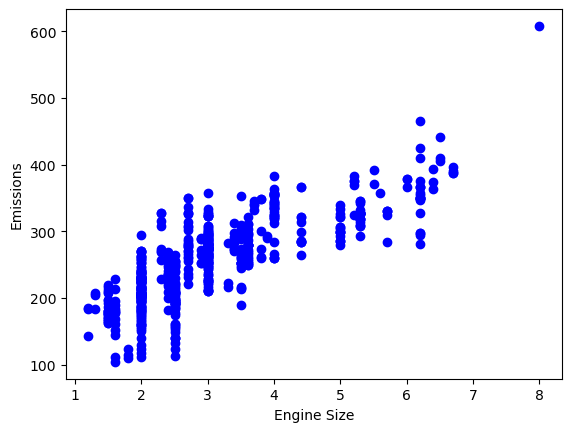

In [23]:
# Engine size is used in the simple linear regression as it is highly correlated with CO2 Emissions

plt.scatter(train.Engine_Size, train.CO2Emissions, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('Emissions')
plt.show()

## Modeling

In [24]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
train_x = np.asanyarray(train[['Engine_Size']])
train_y = np.asanyarray(train[['CO2Emissions']])
regr.fit(train_x, train_y)
# Let's print the coefficients
print("Coefficients:", regr.coef_)
print("Intercept:", regr.intercept_)

Coefficients: [[39.71947301]]
Intercept: [135.43410819]


## Plot Outputs

We can plot the fit line over the data

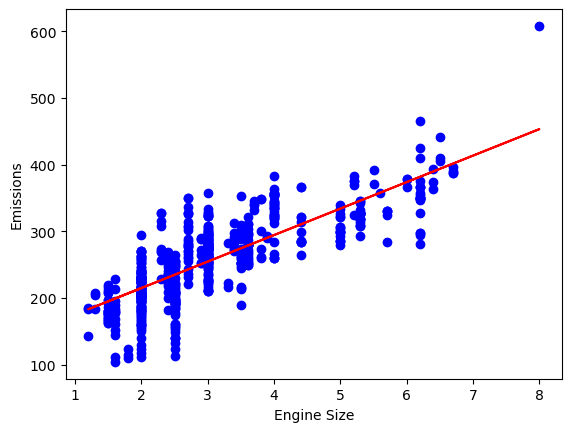

In [25]:
plt.scatter(train.Engine_Size, train.CO2Emissions, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0],'-r')
plt.xlabel('Engine Size')
plt.ylabel('Emissions')
plt.show()

## Evaluation

In [26]:
from sklearn.metrics import mean_squared_error,r2_score

test_x = np.asanyarray(test[['Engine_Size']])
test_y = np.asanyarray(test[['CO2Emissions']])
test_y_ = regr.predict(test_x)

print("Mean Absolute Error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual Sum of Squares(MSE): %.2f" % np.mean((test_y_ - test_y)**2))
print("R2-Score: %.2f" % r2_score(test_y,test_y_))

Mean Absolute Error: 35.14
Residual Sum of Squares(MSE): 2199.47
R2-Score: 0.56


In [27]:
df.to_csv('vehicle_fuel_consumption.csv', index=False)